In [1]:
#sudo apt install graphviz
#%pip install scikit-learn dtreeviz graphviz

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
data = {
    "Outlook": ["Sunny", "Sunny", "Rain", "Rain", "Rain", "Sunny"],
    "Humidity": ["High", "High", "High", "Normal", "Normal", "Normal"],
    "Wind": ["Weak", "Strong", "Strong", "Weak", "Strong", "Strong"],
    "PlayTennis": ["No", "No", "No", "Yes", "No", "Yes"]
}
df = pd.DataFrame(data)

df

,Outlook,Humidity,Wind,PlayTennis
0,Sunny,High,Weak,No
1,Sunny,High,Strong,No
2,Rain,High,Strong,No
3,Rain,Normal,Weak,Yes
4,Rain,Normal,Strong,No
5,Sunny,Normal,Strong,Yes


|--- Humidity <= 0.50
|   |--- class: 0
|--- Humidity >  0.50
|   |--- Wind <= 0.50
|   |   |--- class: 1
|   |--- Wind >  0.50
|   |   |--- Outlook <= 1.00
|   |   |   |--- class: 1
|   |   |--- Outlook >  1.00
|   |   |   |--- class: 0



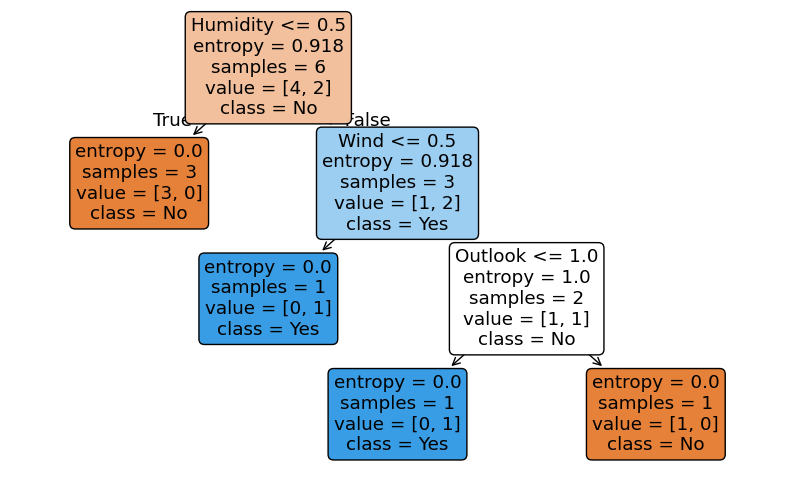

In [ ]:
# Encode (numerical for similar to your image)
df_encoded = df.copy()
df_encoded["Outlook"] = df_encoded["Outlook"].map({"Sunny": 0, "Rain": 2})  # No Overcast, so 0 and 2
df_encoded["Humidity"] = df_encoded["Humidity"].map({"High": 0, "Normal": 1})
df_encoded["Wind"] = df_encoded["Wind"].map({"Weak": 0, "Strong": 1})
df_encoded["PlayTennis"] = df_encoded["PlayTennis"].map({"No": 0, "Yes": 1})

# Features and target
X = df_encoded[["Outlook", "Humidity", "Wind"]]
y = df_encoded["PlayTennis"]

# Train
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X, y)

# Print text tree
print(export_text(clf, feature_names=["Outlook", "Humidity", "Wind"]))

# Plot the tree (your image-like)
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=["Outlook", "Humidity", "Wind"], class_names=["No", "Yes"], filled=True, rounded=True)
plt.show()  